<a href="https://colab.research.google.com/github/frankgeorge/xray-classifier/blob/master/Xray%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [13]:
#import dependencies

from fastai.vision import *
from fastai import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

In [14]:
#version check
import fastai; fastai.__version__

'1.0.61'

In [5]:
#import os 
#os.getcwd()

In [15]:
#set path to current working directory
path = Path().cwd()

In [16]:
path= path/'/content/drive/MyDrive/data'

#list contents in directory
path.ls()

[PosixPath('/content/drive/MyDrive/data/chest'),
 PosixPath('/content/drive/MyDrive/data/knee'),
 PosixPath('/content/drive/MyDrive/data/arm'),
 PosixPath('/content/drive/MyDrive/data/leg'),
 PosixPath('/content/drive/MyDrive/data/dental'),
 PosixPath('/content/drive/MyDrive/data/models'),
 PosixPath('/content/drive/MyDrive/data/export.pkl')]

In [17]:
#set batch size
bs = 64

In [18]:
#apply transforms to images stored
tfms = get_transforms(do_flip=True)

In [19]:
#create databunch
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms = get_transforms(), size = 224)

      #- path = set path
      # train test split = 80/20
      #image size=224

In [20]:
#show xray class types, class name is taken from directory folder name
data.classes


['arm', 'chest', 'dental', 'knee', 'leg']

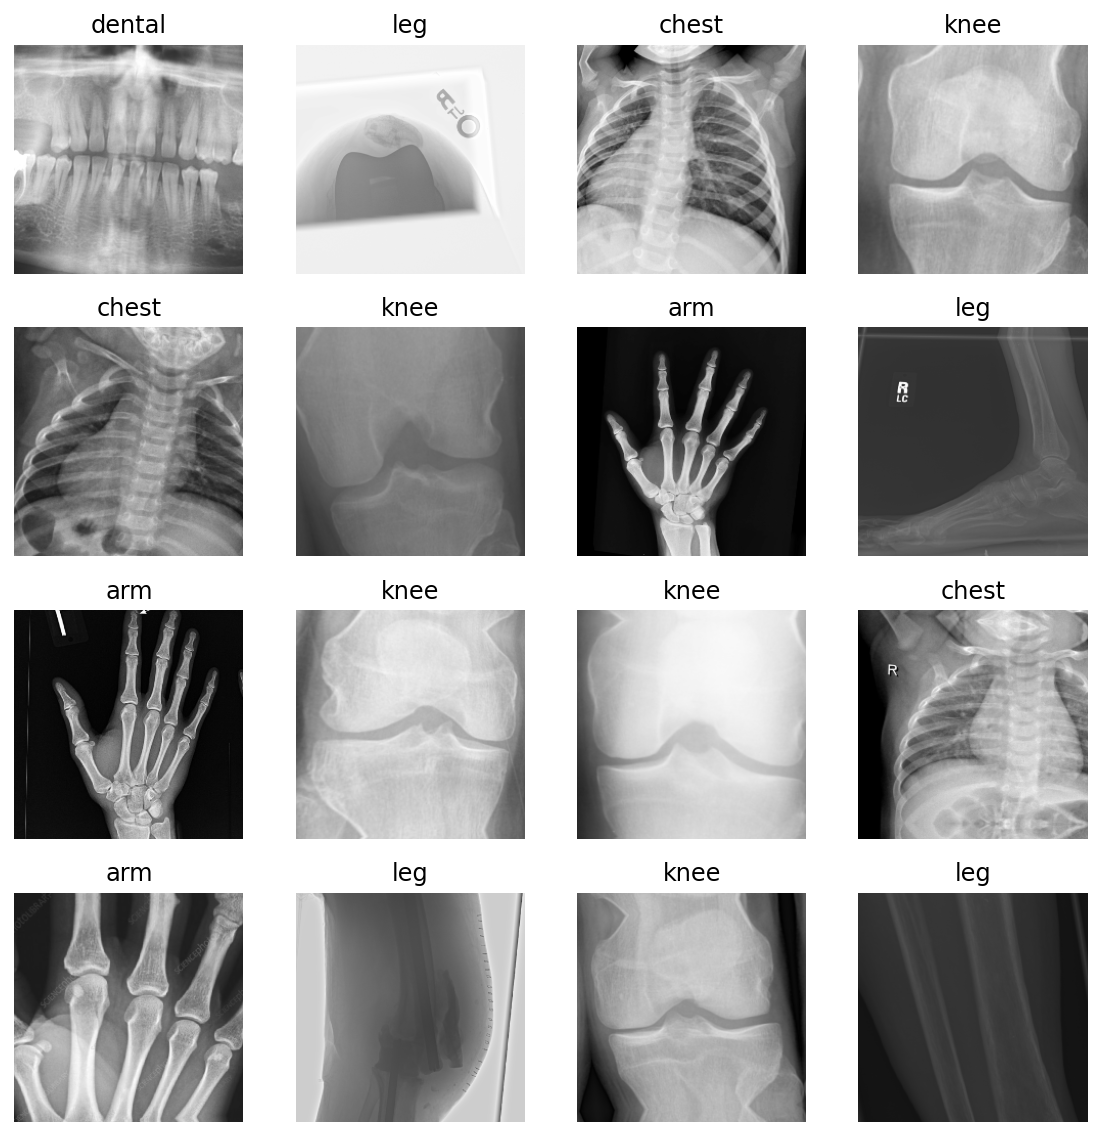

In [21]:
#check if loaded properly
data.show_batch(rows=4, figsize=(8,8))


In [24]:
#Training using cnn 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
          #model resnet34

In [25]:
#run four epochs
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.980838,0.103824,0.041667,04:14
1,0.450584,0.048670,0.023148,00:47
2,0.273755,0.008545,0.004630,00:44
3,0.179804,0.003701,0.000000,00:44


In [ ]:
#learn.lr_find()

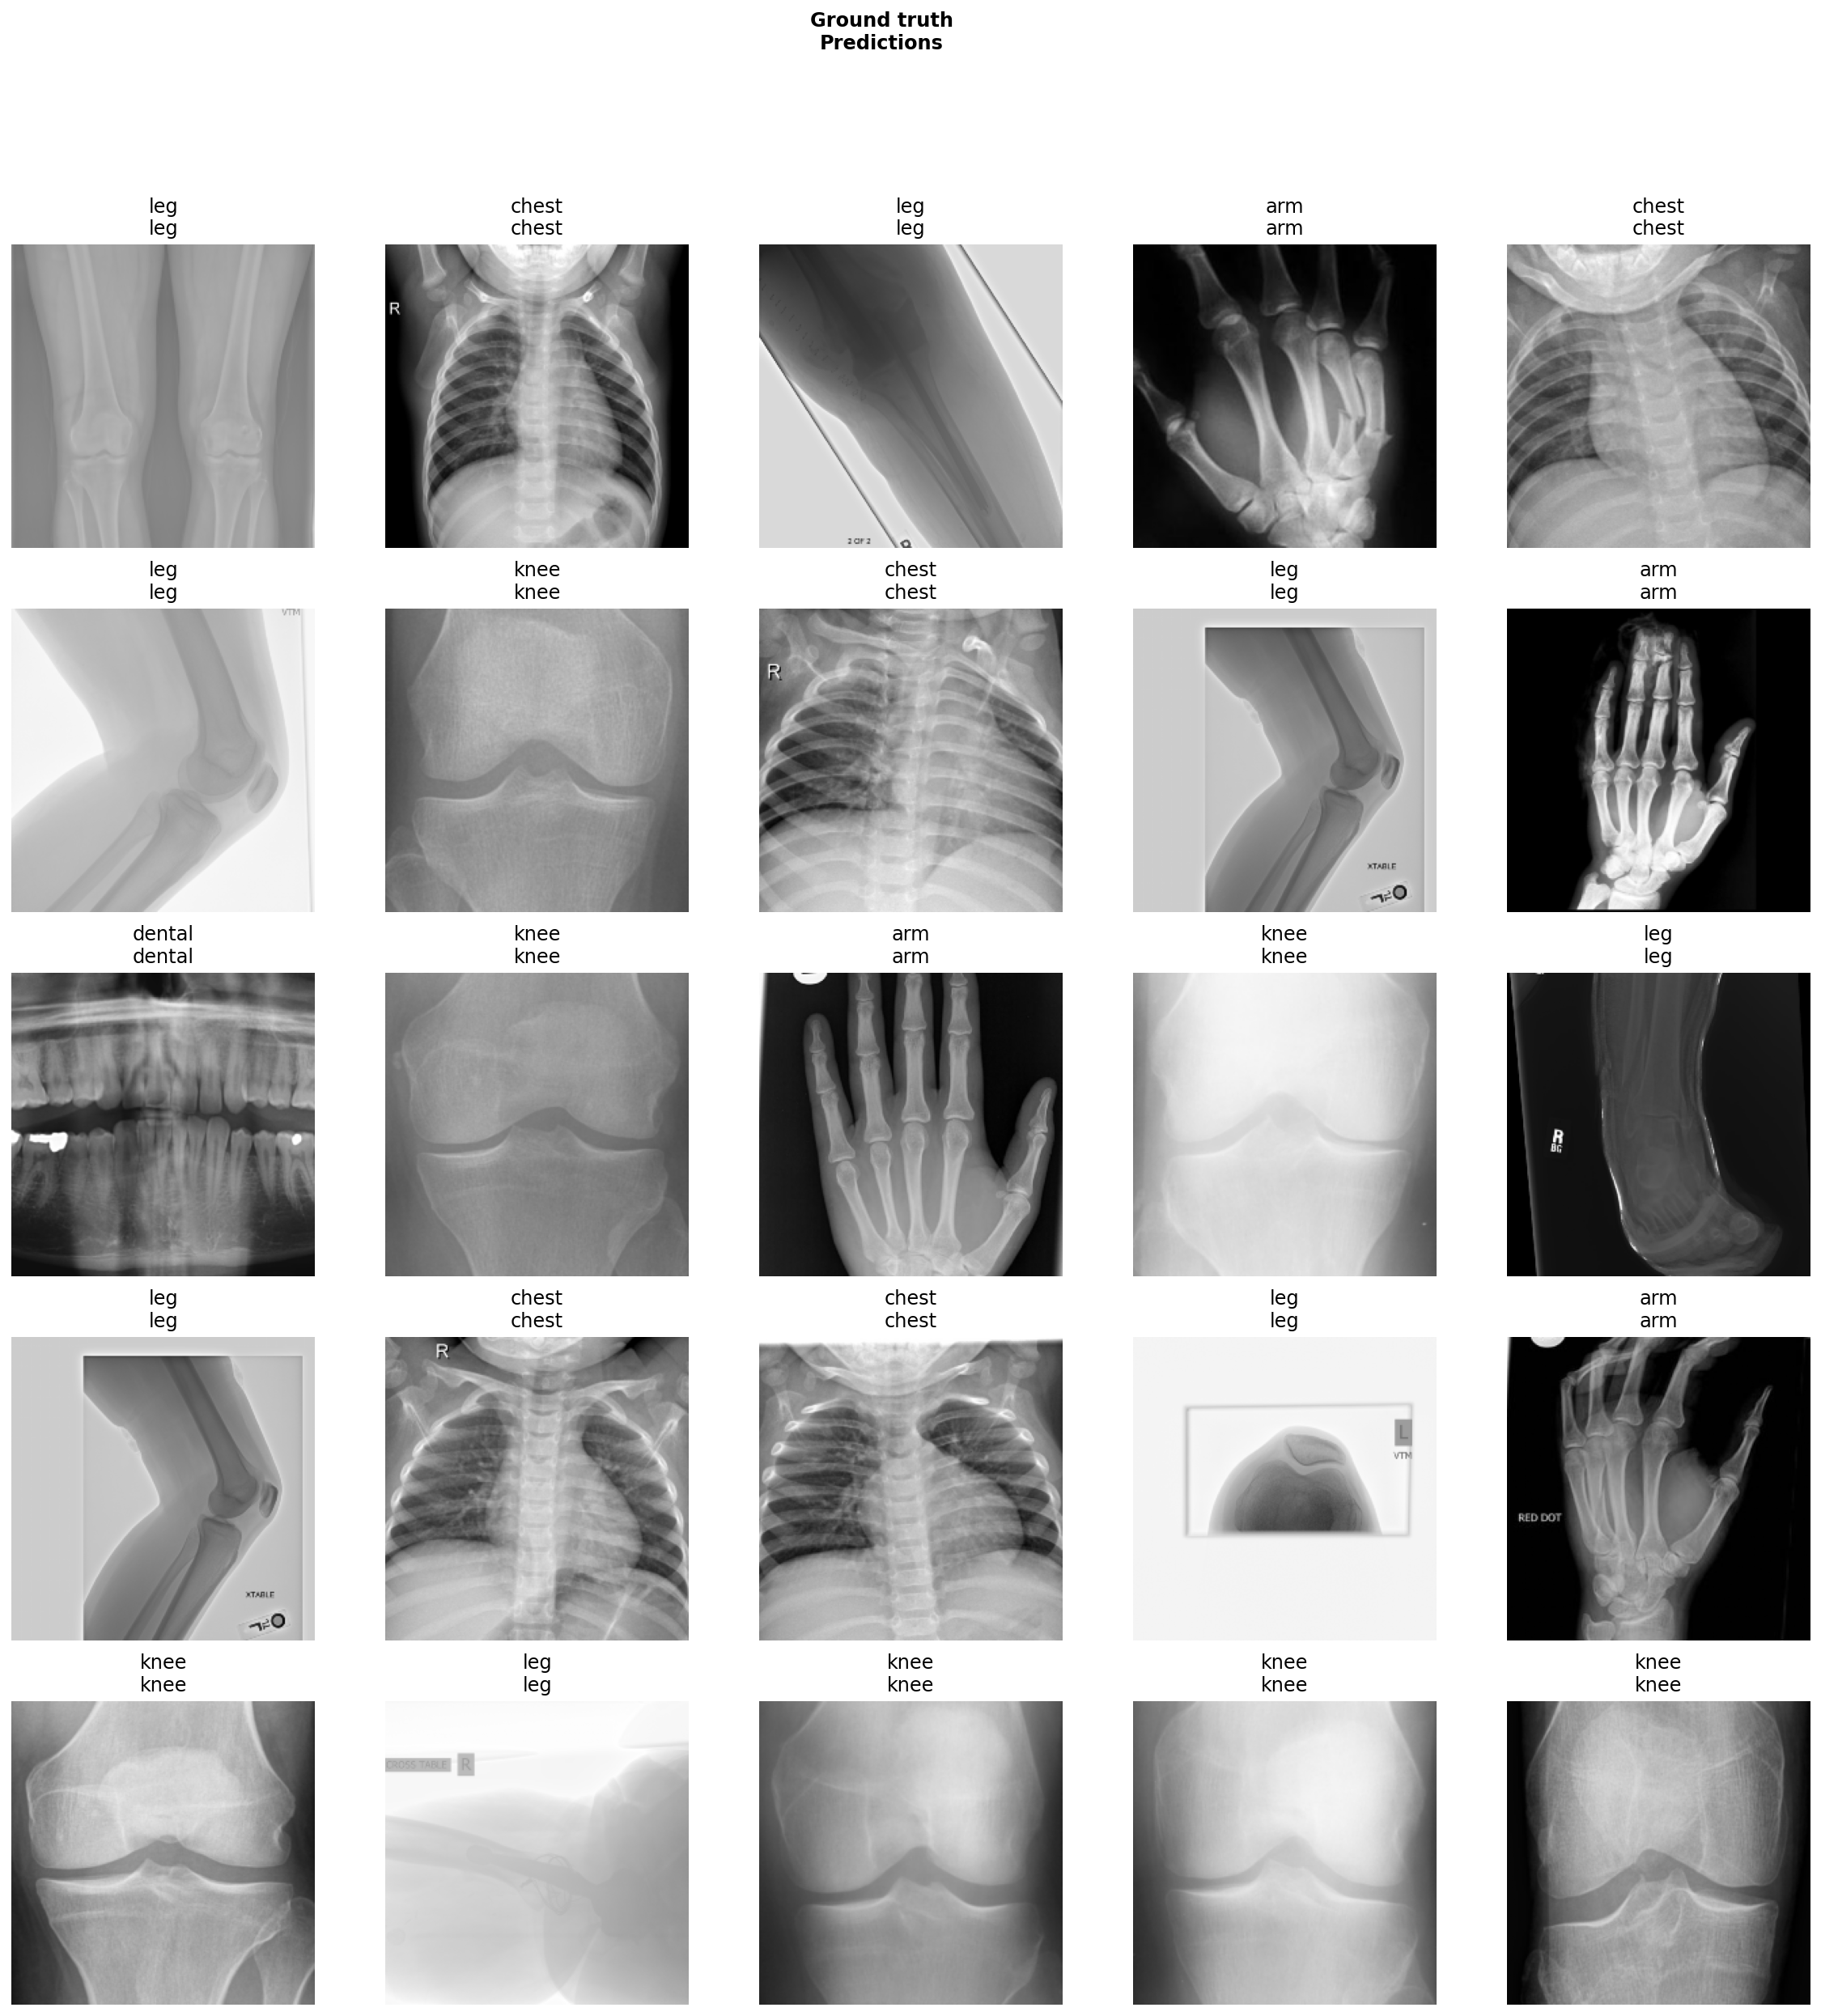

In [26]:
#show result
learn.show_results()

In [27]:
#save model
learn.save('xray-1')


In [28]:
learn.export()

In [29]:
learn=load_learner(path)

In [ ]:
#test result
img = open_image('/content/IM-0115-0001.jpeg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class